# Read datasets

In [1]:
import pandas as pd
# Read the data set of "Marketing Analysis" in data.
fake= pd.read_csv("/home/olga/Desktop/Fake.csv")
true = pd.read_csv("/home/olga/Desktop/True.csv")

# Printing the data
fake.head(5)

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [2]:
true.head(5)

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


# Data cleaning and preparation

In [3]:
def preprocess(text):
    text = text.str.replace('"', '')
    text = text.str.replace('-', '')
    text = text.str.replace(':', '')
    return text

In [4]:
from sklearn.utils import shuffle
fake['label'] = '1'
true['label'] = '0'

# concatenate the two datasets in one
data = pd.concat([fake, true]).reset_index(drop=True)

data = shuffle(data)
data = data.reset_index(drop=True)

data.drop(['date'], axis=1, inplace=True)
data['text'] = preprocess(data['text'])

In [5]:
# Checking the missing values
data.isnull().sum()

title      0
text       0
subject    0
label      0
dtype: int64

# Univariate Analysis

In [6]:
from textblob import TextBlob

# Using TextBlob to calculate sentiment polarity which lies in the range of [-1,1] where 1 means positive sentiment and -1 means a negative sentiment.
# Create new feature for the length of the text.
# Create new feature for the word count of the text.


data['polarity'] = data['text'].map(lambda text: TextBlob(text).sentiment.polarity)
data['text_len'] = data['text'].astype(str).apply(len)
data['word_count'] = data['text'].apply(lambda x: len(str(x).split()))

data

,title,text,subject,label,polarity,text_len,word_count
0,BOILER ROOM: As the Frogs Slowly Boil – EP #40,Tune in to the Alternate Current Radio Network...,US_News,1,0.159654,1136,185
1,More Fake News: Mainstream Media Lies About Tr...,21st Century Wire says Many mainstream news ou...,US_News,1,0.025000,3794,641
2,"Amsterdam mayor Van der Laan, who once snubbed...","AMSTERDAM (Reuters) Eberhard van der Laan, Am...",worldnews,0,0.152976,1309,222
3,"Assad sets sights on Kurdish areas, risking ne...",BEIRUT (Reuters) With Islamic State near defe...,worldnews,0,0.062921,6467,1064
4,Trump says he could jettison drug czar pick,WASHINGTON (Reuters) U.S. President Donald Tr...,politicsNews,0,0.085256,1955,328
...,...,...,...,...,...,...,...
44893,Slovenian government faces test in pre-electio...,LJUBLJANA (Reuters) Slovenians vote in a refe...,worldnews,0,0.077193,2108,350
44894,RADICAL UNHINGED TEACHER Finally Arrested and ...,Please note that this unhinged woman is a midd...,left-news,1,0.128142,2176,344
44895,Mostly White Group Of Boston College Students ...,What Catholic college campus would be complete...,politics,1,0.036923,4064,667
44896,Obama shortens prison sentences of 111 convict...,WASHINGTON (Reuters) U.S. President Barack Ob...,politicsNews,0,0.128045,1554,251


label
0    21417
1    23481
Name: text, dtype: int64


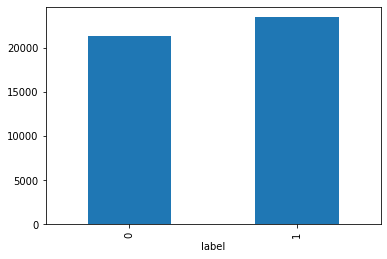

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

# Number of Fake and Real News

fig = plt.figure()
print(data.groupby(['label'])['text'].count())
data.groupby(['label'])['text'].count().plot(kind="bar")
plt.show()

subject
Government News     1570
Middle-east          778
News                9050
US_News              783
left-news           4459
politics            6841
politicsNews       11272
worldnews          10145
Name: text, dtype: int64


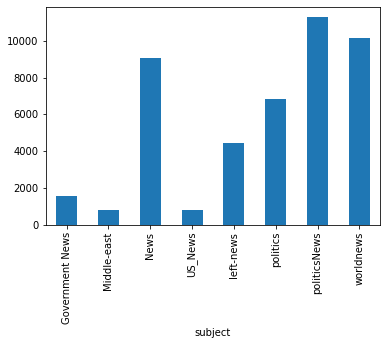

In [8]:
# Number of articles per subject

fig = plt.figure()
print(data.groupby(['subject'])['text'].count())
data.groupby(['subject'])['text'].count().plot(kind="bar")
plt.show()

# Bivariate Analysis

In [9]:
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

# The distribution of top unigrams before removing stop words in the Reliable News
from sklearn.feature_extraction.text import CountVectorizer
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(true['text'], 20)
for word, freq in common_words:
    print(word, freq)
df1 = pd.DataFrame(common_words, columns = ['text' , 'count'])
df1.groupby('text').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 20 words in review before removing stop words')

the 482468
to 245734
of 205275
and 182081
in 181652
on 108594
said 99062
that 88237
for 79895
is 55494
trump 54700
with 54504
he 54370
it 49590
by 47949
was 47946
as 47330
has 46246
from 39383
his 38018


In [10]:
# The distribution of top unigrams after removing stop words in the Reliable News

def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(true['text'], 20)
for word, freq in common_words:
    print(word, freq)
df2 = pd.DataFrame(common_words, columns = ['text' , 'count'])
df2.groupby('text').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 20 words in review after removing stop words')

said 99062
trump 54700
reuters 28976
president 28177
state 21025
government 18846
new 16917
states 16652
house 16640
republican 16243
united 15590
people 15287
year 14777
told 14245
washington 12988
party 12759
election 12306
campaign 10636
donald 10456
security 10162


In [11]:
# The distribution of top unigrams before removing stop words in the Unreliable News
from sklearn.feature_extraction.text import CountVectorizer
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(fake['text'], 20)
for word, freq in common_words:
    print(word, freq)
df1 = pd.DataFrame(common_words, columns = ['text' , 'count'])
df1.groupby('text').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 20 words in review before removing stop words')

the 543551
to 290819
of 236640
and 226971
in 171163
that 151662
is 111234
for 93480
on 83591
it 83380
trump 79300
he 78997
was 67857
with 63419
his 58351
this 58217
as 57768
be 49271
by 47903
are 46475


In [12]:
# The distribution of top unigrams after removing stop words in the Unreliable News

def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(fake['text'], 20)
for word, freq in common_words:
    print(word, freq)
df2 = pd.DataFrame(common_words, columns = ['text' , 'count'])
df2.groupby('text').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 20 words in review after removing stop words')

trump 79300
said 33763
president 27715
people 26570
just 20511
clinton 19173
obama 18797
like 18097
donald 17671
news 14620
new 14394
hillary 14122
time 13844
state 13463
white 13189
twitter 11721
media 11704
american 11319
america 11185
house 11113


In [13]:
fake = data.loc[data.label == '1']
true = data.loc[data.label == '0']

In [14]:
import plotly.graph_objects as go

# What do the labels tell about Sentiment polarity
d=data
trace0 = go.Box(
    y=true['polarity'],
    name = '0-Reliable',
    marker = dict(
        color = 'rgb(214, 12, 140)',
    )
)
trace1 = go.Box(
    y=fake['polarity'],
    name = '1-Unreliable',
    marker = dict(
        color = 'rgb(0, 128, 128)',
    )
)
data = [trace0, trace1]
layout = go.Layout(
    title = "Sentiment Polarity Boxplot of Label"
)

fig = go.Figure(data=data,layout=layout)
fig.show()

In [15]:
# What do the labels tell about the length of the text
trace1 = go.Histogram(
    x=true['text_len'], name='Reliable',
    opacity=0.75
)
trace2 = go.Histogram(
    x=fake['text_len'], name = 'Unreliable',
    opacity=0.75
)

data = [trace1, trace2]
layout = go.Layout(barmode = 'group', title='Distribution of Text Lengths Based on Label')
fig = go.Figure(data=data, layout=layout)

fig.show()

# Multivariate Analysis

In [16]:
# The distribution of top part-of-speech tags of review corpus in Reliable News
blob = TextBlob(str(true['text']))
pos_df = pd.DataFrame(blob.tags, columns = ['word' , 'pos'])
pos_df = pos_df.pos.value_counts()[:20]
pos_df.iplot(
    kind='bar',
    xTitle='POS',
    yTitle='count', 
    title='Top 20 Part-of-speech tagging for review corpus')

In [17]:
# The distribution of top part-of-speech tags of review corpus in Unreliable News
blob = TextBlob(str(fake['text']))
pos_df = pd.DataFrame(blob.tags, columns = ['word' , 'pos'])
pos_df = pos_df.pos.value_counts()[:20]
pos_df.iplot(
    kind='bar',
    xTitle='POS',
    yTitle='count', 
    title='Top 20 Part-of-speech tagging for review corpus')